<a href="https://colab.research.google.com/github/yramin/Ansible-NXOS/blob/master/stockPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description:  This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#           to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price.

In [0]:
#Imoprt the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [92]:
#Get the stock quote
df = web.DataReader('CSCO', data_source='yahoo', start='2012-01-01', end='2020-03-04')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,18.860001,18.480000,18.549999,18.629999,41236600.0,14.633397
2012-01-04,19.000000,18.350000,18.440001,18.990000,52927700.0,14.916168
2012-01-05,19.000000,18.670000,18.930000,18.920000,37865300.0,14.861184
2012-01-06,19.000000,18.830000,18.950001,18.850000,27796900.0,14.806202
2012-01-09,19.100000,18.790001,18.870001,18.969999,37811500.0,14.900459
...,...,...,...,...,...,...
2020-02-27,42.099998,40.009998,41.279999,40.040001,51442900.0,40.040001
2020-02-28,40.549999,38.349998,38.700001,39.930000,80194000.0,39.930000
2020-03-02,41.189999,38.919998,40.150002,41.169998,48864300.0,41.169998


In [93]:
#Get the number of rows and columns in the data set
df.shape

(2055, 6)

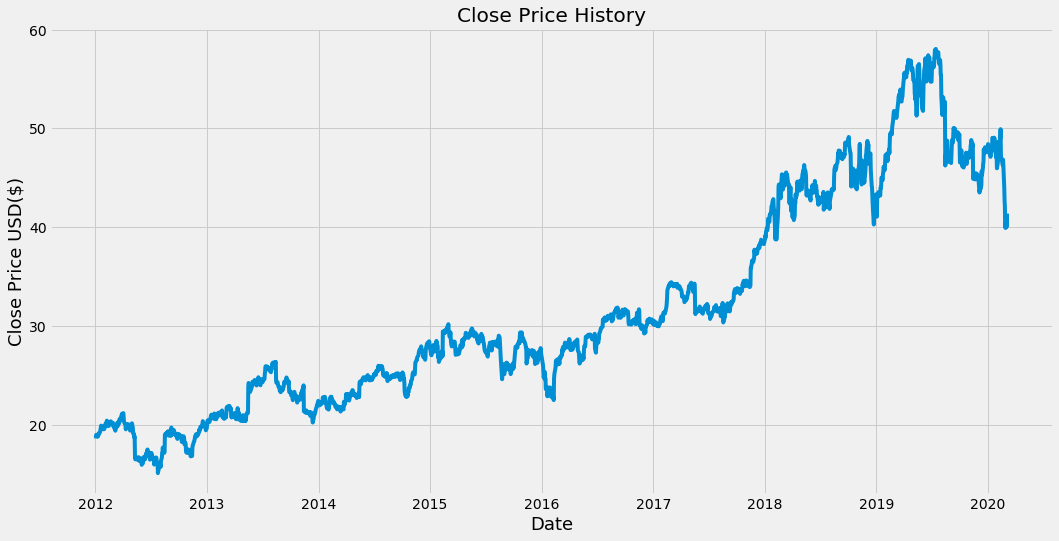

In [94]:
#Visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [95]:
#Create a new dataframce with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the numbr of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)
                               
training_data_len

1644

In [96]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.08176099],
       [0.09014675],
       [0.08851619],
       ...,
       [0.60680174],
       [0.58047988],
       [0.61192639]])

In [97]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.08176099, 0.09014675, 0.08851619, 0.08688564, 0.08968086,
       0.08641976, 0.09201025, 0.09387374, 0.0917773 , 0.09760074,
       0.10295833, 0.10878176, 0.11180993, 0.10971349, 0.10948055,
       0.10971349, 0.10971349, 0.10342417, 0.10342417, 0.10552061,
       0.10901466, 0.10901466, 0.11576987, 0.11809925, 0.11833219,
       0.12368974, 0.11367343, 0.11134404, 0.11437225, 0.11530398,
       0.11157699, 0.11809925, 0.12042863, 0.12205918, 0.11646869,
       0.11903097, 0.11693453, 0.11763336, 0.11833219, 0.11087816,
       0.11087816, 0.10808294, 0.10435594, 0.10156067, 0.09993012,
       0.10621944, 0.10901466, 0.10971349, 0.11879803, 0.11833219,
       0.11157699, 0.11437225, 0.11693453, 0.12695085, 0.12532029,
       0.12252503, 0.12601912, 0.13324017, 0.13487072, 0.13883066])]
[0.13766598859451706]

[array([0.08176099, 0.09014675, 0.08851619, 0.08688564, 0.08968086,
       0.08641976, 0.09201025, 0.09387374, 0.0917773 , 0.09760074,
       0.10295833, 0.10878176, 0.11

In [0]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [99]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1584, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [103]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1584/1584 [==============================] - 108s 68ms/step - loss: 8.4209e-04


In [0]:
#Create the tetsing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [108]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

1.6835423119166761

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


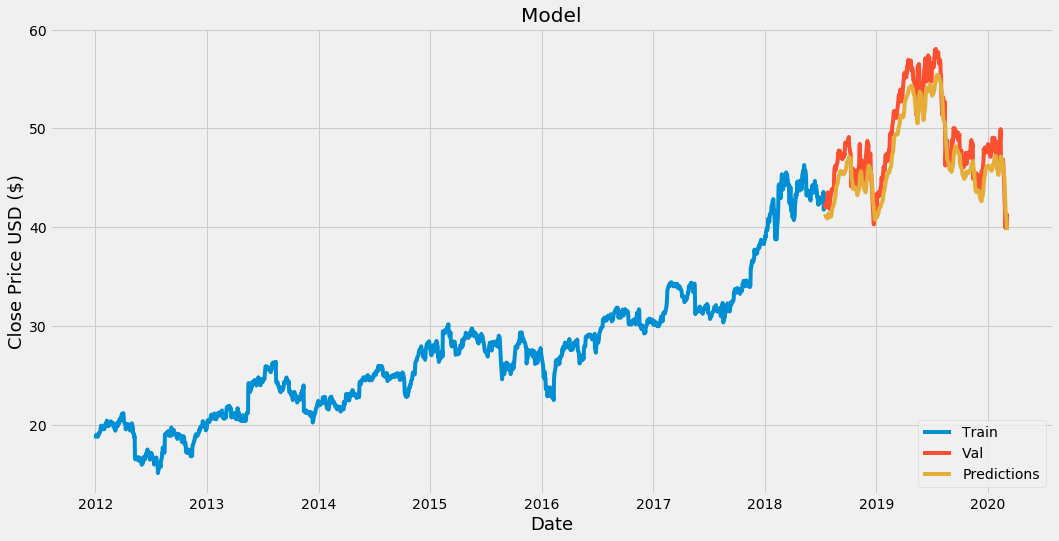

In [109]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions',], loc='lower right')
plt.show()

In [110]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-07-17,42.340000,41.319481
2018-07-18,42.209999,41.229572
2018-07-19,42.400002,41.130974
2018-07-20,42.009998,41.076145
2018-07-23,42.060001,40.985100
...,...,...
2020-02-27,40.040001,42.906273
2020-02-28,39.930000,41.804951
2020-03-02,41.169998,40.791893


In [111]:
#Get the quote
apple_quote = web.DataReader('CSCO', data_source='yahoo', start='2012-02-01', end='2020-03-03')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
#Convert the. X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[39.711014]]


In [112]:
#Get the quote
apple_quote2 = web.DataReader('CSCO', data_source='yahoo', start='2020-03-04', end='2020-03-04')
print(apple_quote2['Close'])

Date
2020-03-04    41.389999
Name: Close, dtype: float64
